In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import idx2numpy
train_images = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')

test_images = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')

Preprocess Images

In [ ]:
# Reshape
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
# Normalize
train_images = train_images/255
test_images = test_images/255

Display Some Images

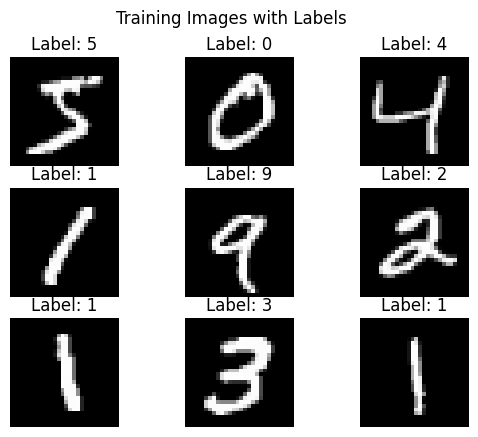

In [ ]:
fig, axs = plt.subplots(3, 3)
for i, ax in enumerate(axs.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')
fig.suptitle('Training Images with Labels')
plt.show()

Train Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2 )))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience= 2)

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1415 - accuracy: 0.9566 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0310 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0363 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0392 - val_accuracy: 0.9879


Evaluate Model

313/313 - 4s - loss: 0.0392 - accuracy: 0.9879 - 4s/epoch - 12ms/step


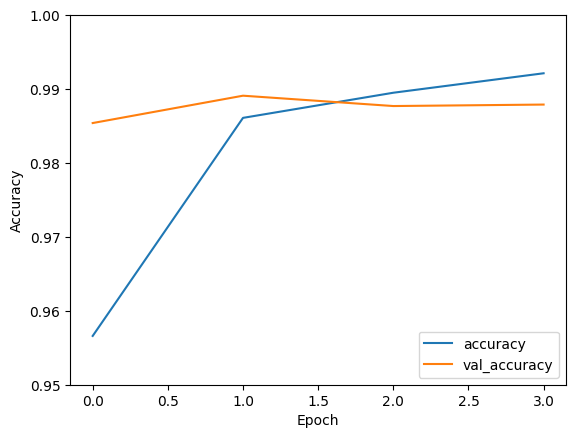

In [ ]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([.95,1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [ ]:
print(test_acc)

0.9879000186920166


1/1 [==============================] - 0s 26ms/step


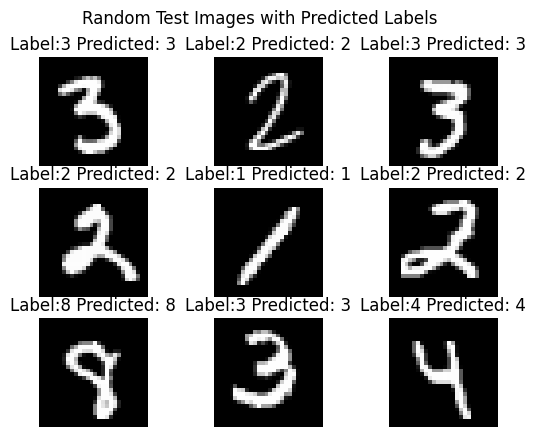

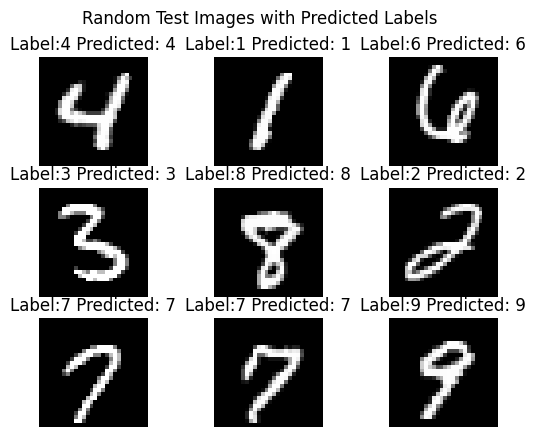

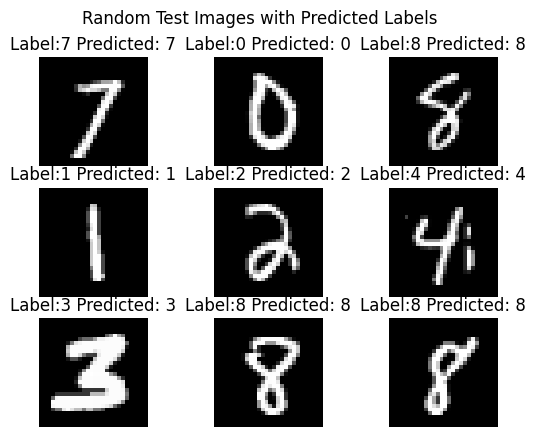

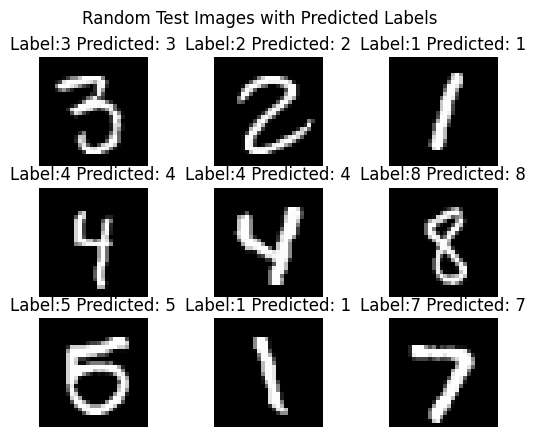

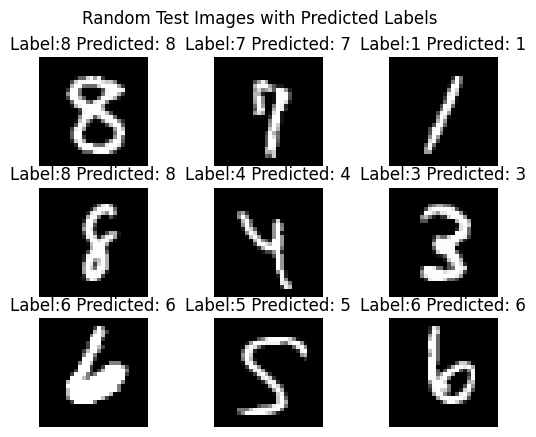

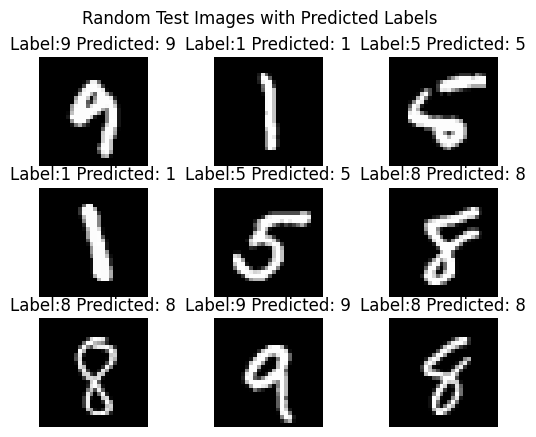

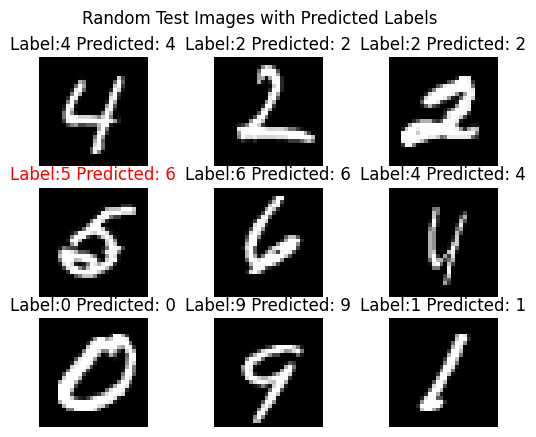

In [ ]:
incorrect_pred = False
for j in range(100):
  random_test_images = np.random.choice(test_images.shape[0], size=9, replace=False)
  predictions = model.predict(test_images[random_test_images])
  fig, axs = plt.subplots(3,3)
  for i, ax in enumerate(axs.flat):
    ax.imshow(test_images[random_test_images[i]], cmap = 'gray')
    if test_labels[random_test_images[i]] != np.argmax(predictions[i]):
      title_color = 'red'
      incorrect_pred = True
    else:
      title_color = 'black'
    ax.set_title(f"Label:{test_labels[random_test_images[i]]} Predicted: {np.argmax(predictions[i])}", color=title_color)
    ax.axis('off')
  fig.suptitle('Random Test Images with Predicted Labels')
  if j > 4 and (j % 5 == 4 or incorrect_pred):
    plt.show()
    break
  elif j == 99:
    plt.show()

Interpetation:

I originally ran the model through 10 epochs, but I noticed from the graph that on the last two epochs the val_accuracy decreased significantly. This is a sign of overfitting. To help resolve this issue, I implemented the EarlyStopping callback, which is designed to stop after a specified number of epochs without improving. This significantly reduced the issue of overfitting, but the val_accuracy is still not perfect. This model has approximately 98.79% accuracy. After generating a couple sets and viewing the results, the numbers that the model had difficulty with I also had difficulty discerning its true value.